In [2]:
from astropy.table import Table as Catalog
import utils
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as patches
from matplotlib.path import Path
import ligo.skymap.postprocess

euclid_fp = Catalog.read('../rsd2024a-roi-footprint-equ-13.fits')
hpmap = np.ones(euclid_fp['M'].size)
hpmap[euclid_fp['M'] == 0] = 0
utils.plot_moll(hpmap, rot=115, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False, euclid_fp=False)


/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


FileNotFoundError: [Errno 2] No such file or directory: '../rsd2024a-roi-footprint-equ-13.fits'

In [3]:
import healpy as hp

hpmap_out = hp.ud_grade(hpmap, 256)

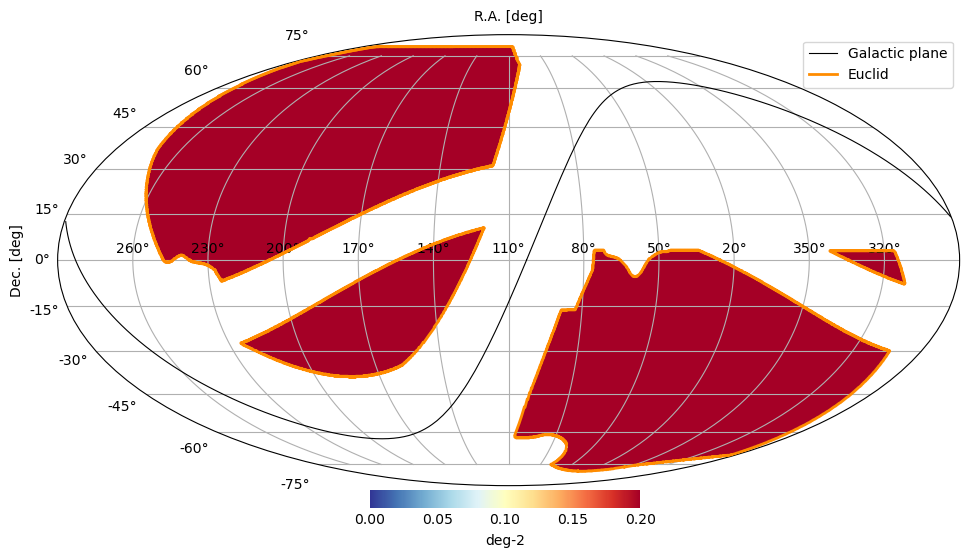

In [5]:
utils.plot_moll(hpmap_out, rot=110, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False, euclid_fp=True)


In [137]:
hpmap_out_sgc = hpmap_out.copy()
hpmap_out_sgc[utils.healpix_in_sgc(hp.npix2nside(hpmap_out_sgc.size))] = 0 


In [150]:
nside=256
theta, phi = hp.pix2ang(nside, range(hp.nside2npix(nside)),nest=False)  
ra= phi*180./np.pi
dec = 90.-(theta*180./np.pi)

hpmap_out_sgc[(dec <-10)]=0
hpmap_out_sgc[(ra<300)] = 0 


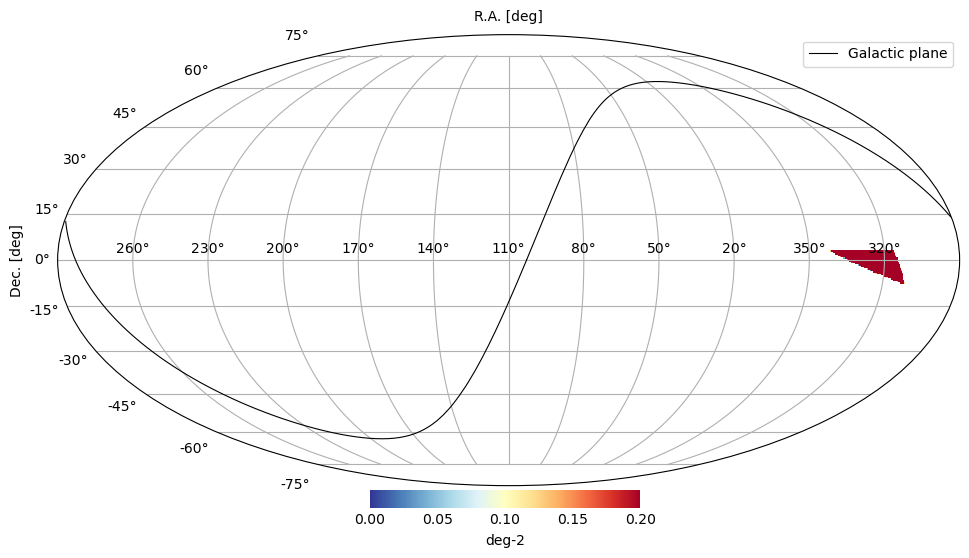

In [151]:
utils.plot_moll(hpmap_out_sgc, rot=110, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False, euclid_fp=False)


In [31]:
hpmap_out_sgc.size

786432

array([89.99678775, 89.99678775, 89.99678775, ..., 89.96288064,
       89.96288064, 89.96288064])

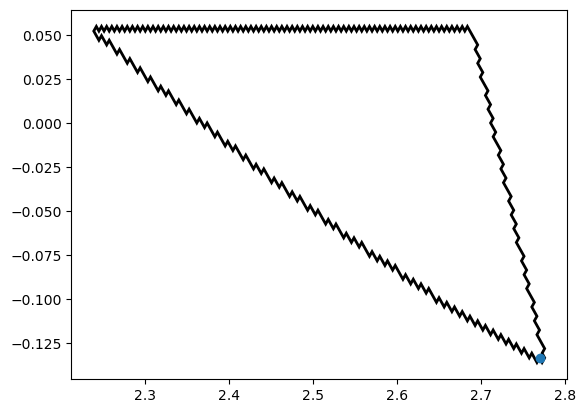

Path(array([[ 2.76968753e+00, -1.33206623e-01],
       [ 2.77275550e+00, -1.35834543e-01],
       [ 2.77582346e+00, -1.33206623e-01],
       [ 2.77275550e+00, -1.30579629e-01],
       [ 2.77582346e+00, -1.27953541e-01],
       [ 2.76661957e+00, -1.20080523e-01],
       [ 2.76968753e+00, -1.17457869e-01],
       [ 2.76355161e+00, -1.12214976e-01],
       [ 2.76661957e+00, -1.09594701e-01],
       [ 2.76048365e+00, -1.04356396e-01],
       [ 2.76355161e+00, -1.01738330e-01],
       [ 2.75434773e+00, -9.38882558e-02],
       [ 2.75741569e+00, -9.12728775e-02],
       [ 2.75127976e+00, -8.60439803e-02],
       [ 2.75434773e+00, -8.34304248e-02],
       [ 2.74821180e+00, -7.82050089e-02],
       [ 2.75127976e+00, -7.55931121e-02],
       [ 2.74207588e+00, -6.77604488e-02],
       [ 2.74514384e+00, -6.51505098e-02],
       [ 2.73900792e+00, -5.99319469e-02],
       [ 2.74207588e+00, -5.73232870e-02],
       [ 2.73593996e+00, -5.21071207e-02],
       [ 2.73900792e+00, -4.94995785e-02],
      

In [153]:
ra_center=110
#ax = ar_init_sky(desi=False, fourmost=False, ra_center=ra_center)
fig, ax = plt.subplots(1)
tt = ligo.skymap.postprocess.contour(hpmap_out_sgc,[.1])
tt = tt[0][0]
'''ra_center=np.radians(ra_center)
ra = np.remainder(np.array(tt)[:,0].reshape(len(tt),1) + 2*np.pi - ra_center, 2*np.pi)
        #
        # Scale conversion to [-180, 180].
        #
ra[ra > np.pi] -= np.pi*2
ra = ra[mask_dec]
dec= np.array(tt)[:,1][mask_dec]
ngcpoly = Path(np.vstack((-ra.T,dec)).T)'''


ra = np.array(tt)[:,0].reshape(len(tt),1)

ra = utils.projection_ra(np.rad2deg(ra), ra_center=ra_center)
dec= np.array(tt)[:,1]
ngcpoly = Path(np.vstack((ra.T,dec)).T)


patch = patches.PathPatch(ngcpoly, facecolor='w', lw=2)
ax.add_patch(patch)

ax.scatter(ngcpoly.to_polygons()[0].T[0][0], ngcpoly.to_polygons()[0].T[1][0])
'''ttt = [pd.read_csv(path, header=None) for path in glob.glob('/pscratch/sd/a/arocher/4MOST/LRG_SGC/LRG_SGC_exterior*.csv')]
for tt in ttt:
    ax.plot(ax.projection_ra(tt[0]), ax.projection_dec(tt[1]),c='r')'''

plt.show()

ngcpoly

In [154]:
np.save('mask_fp/euclid_sgc_high_footprint.npy', ngcpoly.to_polygons()[0])

In [113]:
ngcpoly.to_polygons()[1]

IndexError: list index out of range